In [9]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

<font size="5">**Punto 1**.</font>

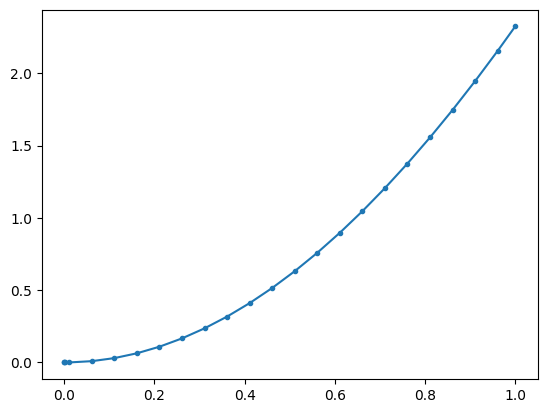

[[0.00000000e+00 2.12392730e-08 2.56995186e-06 2.61687238e-04
  7.92737332e-03 2.61975842e-02 5.50410586e-02 9.44086314e-02
  1.44233567e-01 2.04432010e-01 2.74903540e-01 3.55531835e-01
  4.46185423e-01 5.46718512e-01 6.56971903e-01 7.76773947e-01
  9.05941565e-01 1.04428129e+00 1.19159036e+00 1.34765777e+00
  1.51226539e+00 1.68518905e+00 1.86619955e+00 2.01246973e+00]
 [0.00000000e+00 1.22625000e-08 1.48376240e-06 1.51085197e-04
  4.57687112e-03 1.51251823e-02 3.17779700e-02 5.45068488e-02
  8.32732889e-02 1.18028876e-01 1.58715633e-01 2.05266401e-01
  2.57605274e-01 3.15648080e-01 3.79302905e-01 4.48470648e-01
  5.23045607e-01 6.02916086e-01 6.87965016e-01 7.78070577e-01
  8.73106832e-01 9.72944349e-01 1.07745081e+00 1.16189994e+00]]


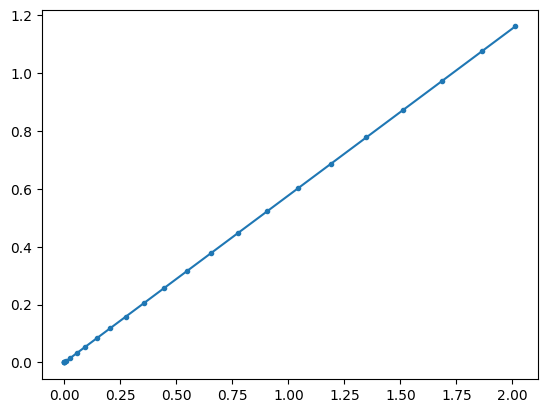

In [11]:
sin = np.sin
cos = np.cos

def system(t,y, theta, gamma, mass):
    g = 9.81
    x,v = y
    return [v, g*sin(theta) - (gamma/mass)*v**2] #Primero se pone la ecuacion dif. correspondiente a x [dx/dt = v], luego la de v [a=dv/dt=....]

theta = np.deg2rad(30)
y0 = np.array([0.,0.])
t_span = (0,1) #tiempos desde 0 a 1
args = [theta, 0.7, 10] #ángulo theta, coeficiente gamma y la masa
sol = solve_ivp(
    system, 
    y0=y0, 
    t_span=t_span, 
    args=args, 
    max_step=0.05
    )

#sol.t es el linspace de tiempos que genera solve_ivp
#sol.y es un array [x,v] primero pone el array de puntos que solucionan dx/dt=v, luego el array de puntos que solucionan dv/dt=....
plt.plot(sol.t, sol.y[0],".-")
plt.show()

coord = np.array([cos(theta)*sol.y[0],sin(theta)*sol.y[0]]) #No le encuentro sentido al -theta y que la gráfica esté bien
print(coord)

plt.plot(coord[0], coord[1],".-")
plt.show()